# ⚖️ Overfitting and Underfitting in Machine Learning

When training models, we want them to **generalize well** — meaning perform well on both training and unseen (test) data.

However, models can suffer from two common problems:
- **Underfitting** → Model is too simple and cannot capture the patterns in data.
- **Overfitting** → Model is too complex and memorizes the training data instead of learning patterns.

---

### 🔹 Underfitting
- The model performs **poorly on both training and test data**.
- It **fails to learn relationships** from data.
- Example: Using a linear model for data with a curved (non-linear) relationship.

---

### 🔹 Overfitting
- The model performs **very well on training data** but **poorly on test data**.
- It **learns noise and random fluctuations** instead of true patterns.
- Example: A complex model with too many parameters (like a deep decision tree).

---

### 🔹 Just Right (Good Fit)
- The model performs **well on both training and test data**.
- It captures the true underlying pattern.

---


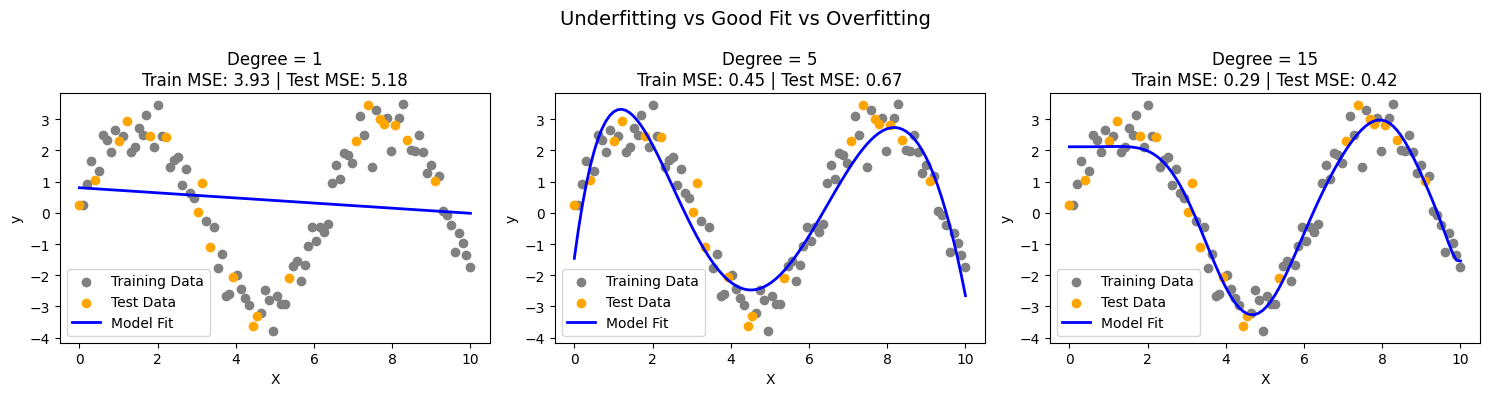

In [1]:
# 📊 Visualizing Underfitting, Overfitting, and Good Fit

import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

# Create synthetic data (non-linear pattern)
np.random.seed(42)
X = np.linspace(0, 10, 100).reshape(-1, 1)
y = 3 * np.sin(X) + np.random.normal(0, 0.5, X.shape)

# Split into training and test data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define models with increasing complexity
degrees = [1, 5, 15]  # 1 = underfit, 5 = good fit, 15 = overfit

plt.figure(figsize=(15, 4))

for i, degree in enumerate(degrees, 1):
    # Create polynomial features
    poly = PolynomialFeatures(degree=degree)
    X_poly_train = poly.fit_transform(X_train)
    X_poly_test = poly.transform(X_test)
    
    # Train model
    model = LinearRegression()
    model.fit(X_poly_train, y_train)
    
    # Predict
    y_pred_train = model.predict(X_poly_train)
    y_pred_test = model.predict(X_poly_test)
    
    # Calculate errors
    train_error = mean_squared_error(y_train, y_pred_train)
    test_error = mean_squared_error(y_test, y_pred_test)
    
    # Plot results
    plt.subplot(1, 3, i)
    plt.scatter(X_train, y_train, color='gray', label='Training Data')
    plt.scatter(X_test, y_test, color='orange', label='Test Data')
    plt.plot(X, model.predict(poly.transform(X)), color='blue', linewidth=2, label='Model Fit')
    plt.title(f"Degree = {degree}\nTrain MSE: {train_error:.2f} | Test MSE: {test_error:.2f}")
    plt.xlabel("X")
    plt.ylabel("y")
    plt.legend()

plt.suptitle("Underfitting vs Good Fit vs Overfitting", fontsize=14)
plt.tight_layout()
plt.show()
